In [3]:
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

import os, glob
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from numpy import arange
import xarray as xr
from netCDF4 import Dataset

In [4]:
def modify_lon(eddy_file):
    foo =  Dataset(eddy_file, "a")
    foo.variables['longitude'][:] = foo.variables['longitude'][:] - 360
    foo.variables['longitude_max'][:] = foo.variables['longitude_max'][:] - 360
    foo.variables['effective_contour_longitude'][:] = foo.variables['effective_contour_longitude'][:] -360
    foo.variables['speed_contour_longitude'][:] = foo.variables['speed_contour_longitude'][:] - 360
    foo.close
    

def PyEddy(hycom_file, directory_out, pre_filter = False, plot_png = False):

    # Load hycom data (adt = ssh, ugos, vgos)
    hycom = RegularGridDataset(hycom_file, 'lon', 'lat')
    
    # Extract Date from file
    date = os.path.basename(hycom_file)[15:23]
    print(date, int(date[0:4]), int(date[4:6]), int(date[6:8]))
    
    if pre_filter:
        hycom.bessel_high_filter('adt', 500, order=3)# 500 km
        
    with Datast(
        
    a, c = hycom.eddy_identification(
        'adt', 'ugos', 'vgos',    # Variables used for identification
        datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])),
        0.005,                    # step between two isolines of detection (m)
        pixel_limit=(100, 200000),  # Min and max pixel count for valid contour
        shape_error=55)           # Error max (%) between ratio of circle fit and contour

    print(type(a))
    with Dataset(directory_out + '/Anticyclonic_' + date + '_original'  + '.nc', 'w') as h:
        a.to_netcdf(h)
    with Dataset(directory_out + '/Cyclonic_' + date + '_original'  + '.nc', 'w') as h:
        c.to_netcdf(h)

    modify_lon(directory_out + '/Anticyclonic_' + date + '_original' + '.nc') 
    modify_lon(directory_out + '/Cyclonic_' + date + '_original' + '.nc')

In [5]:
dir = "/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/"
hycom_in = dir + "hycom_gomu_501_2006030900_t000.nc"
directory_out = "/data/watkinson/Summer2022/data/eddies/test"

PyEddy(hycom_in, directory_out,pre_filter = True)#, plot_png = False)

We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc


20060309 2006 3 9


/data/watkinson/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<class 'py_eddy_tracker.observations.observation.EddiesObservations'>


We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc


AttributeError: 'NoneType' object has no attribute 'display'

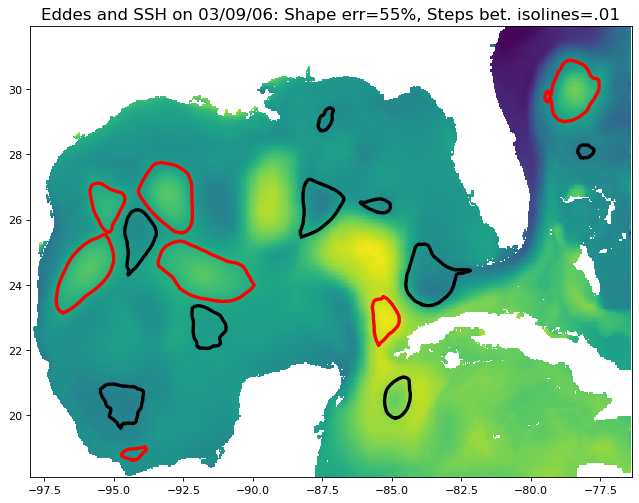

In [14]:
dir = "/data/watkinson/Summer2022/data/eddies/test/"
a = EddiesObservations.load_file(dir + 'Anticyclonic_20060309_original.nc')
c = EddiesObservations.load_file(dir + 'Cyclonic_20060309_original.nc')
hycom_in = "/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc"
import xarray as xr
SSH_data = xr.open_dataset(hycom_in)
g = RegularGridDataset(("/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc"),
    "lon",
    "lat"
)
hycom = RegularGridDataset((hycom_in), "lon", 'lat')
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_axes([.03,.03,.94,.94])
ax.set_title('Eddes and SSH on 03/09/06: Shape err=55%, Steps bet. isolines=.01',fontsize=15)#,fontweight='bold')
a.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='r',lw=3,ls='solid') 
c.display(ax, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
m = hycom.display(ax, "adt", vmin=-.8, vmax=.6, cmap="viridis")
g.contours.display(ax,display_criterion=True)
#hycom.contours.display(ax,display_criterion=True)#only_unused=True)
'''
import numpy as np
lat=SSH_data.lat
lon=SSH_data.lon
ssh = SSH_data.adt
print(np.min(ssh))
print(np.max(ssh))
lon2d,lat2d=np.meshgrid(lon,lat)
cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='viridis',levels=np.linspace(-.8,.6,400))
cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='w',alpha=.7,levels=[-.9,-.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6])
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=20)
_= ax.legend(loc="best")
'''